In [4]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from operator import attrgetter
from pytplan import *

ag_ha = attrgetter(*'t v_0 v_c v_1 a_max'.split())
ag = attrgetter(*'x t v_0 v_c v_1 v_max a_max'.split())

def ch(v):
    for e in chain(*v):
        if e is not None:
            yield e

j = Joint(5_000, 50_000)
       
   

In [45]:
from trajectory.gsolver import * 
accel_xt(0, 500, j.a_max), accel_xt(0, 1000, j.a_max),  accel_xt(0, 2000, j.a_max), 

((2.5, 0.01), (10.0, 0.02), (40.0, 0.04))

In [24]:
j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 1000

sl.move([x,x/4])

b = sl[0][0]
print(b.t)
ss = b.iter_steps()

l= list(ss)
len(l)


0.30006518899294243


75017

<AxesSubplot:xlabel='t'>

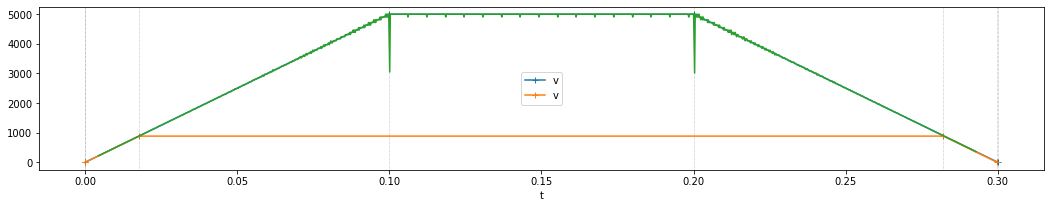

In [29]:
j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 1000

sl.move([x,x/4])

ax = sl.plot()

b = sl[0][0]
t = pd.Series(list(s[1] for s in b.iter_steps()))
#ax = (t.rolling(500).mean()*(250_000)).plot(figsize=(20,3))

# Calculate velocity
x = t.to_frame('step')
x['t'] = 4/1e6
x['t'] = x.t.cumsum()
x = x[x.step==1]
v = (1/x.t.diff()).to_frame('v')
x = x.join(v)
x = x[x.v < 20_000]
x.set_index('t').v.plot(ax=ax)



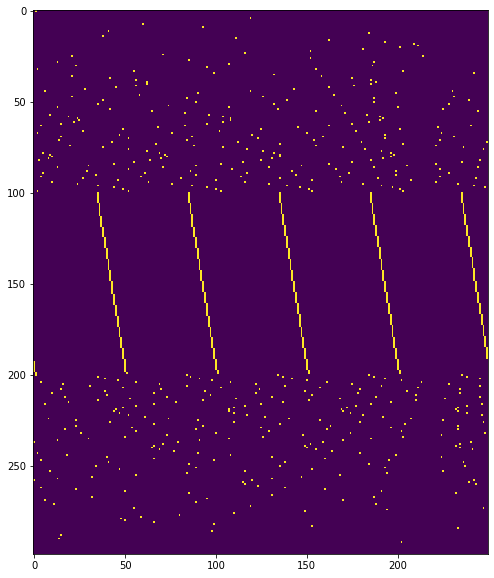

In [50]:
l = 299
last = l*(len(t)//l)
img = t.values[:last].reshape( (l,-1) )

from matplotlib import pyplot as plt
fig,ax = plt.subplots(1, figsize=(10,10))
ax.imshow(img, interpolation='nearest')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


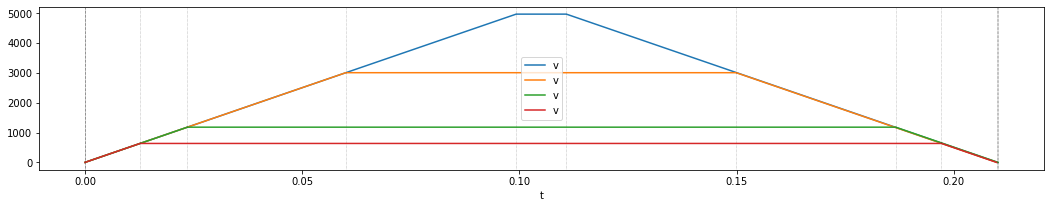

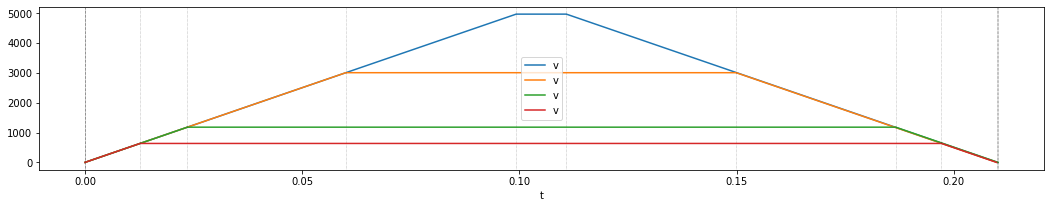

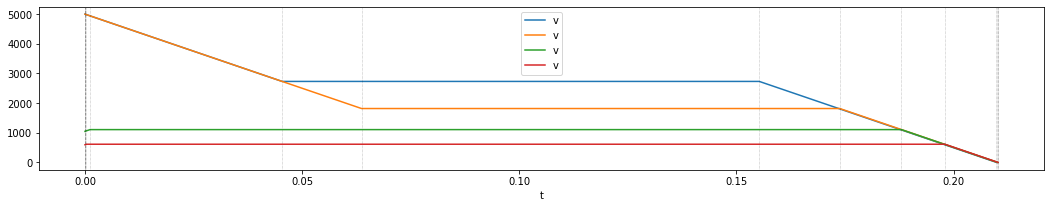

In [48]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Joint, SegmentList
from trajectory.plot import *
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4
s = Segment(0, [550, 450, 220, 125], joints)
sl[0].plan(v_0=0, v_1=0)
s.plan()
s.plot()
sl[0].plan(v_0=j.v_max, v_1=j.v_max)
s.plot()
s.plan(v_0=j.v_max, v_1=0)
s.plot()


[3, 3, 3, 3]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0


Counter({'N': 28, 'VC': 11, 'T1': 1})

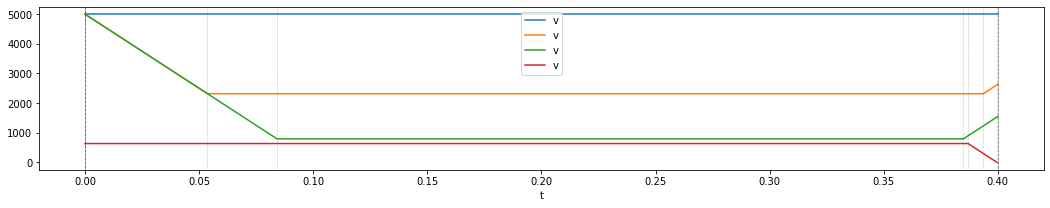

In [98]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Joint, SegmentList
from trajectory.plot import *
from trajectory.planner import Segment, SegmentList, Joint

joints = [Joint(5_000, 50_000),Joint(5_000, 50_000),Joint(5_000, 50_000),Joint(5_000, 50_000)]
for i,j in enumerate(joints):
    j.n = int(i)
 
s = Segment(0, [2000,1000,500,250], joints)

s.plan(v_0=j.v_max, v_1=j.v_max)
s.plot()

print(s.dominant)
Counter(chain(*[b.reductions for b in s]))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0.0010097484835343792, 0.014863384540541218, 3.181980515340684e-05, 0.03858540283578753, 0.0, 5.2325901807817595e-05]


0.2520|[0        245↗   711@4951  ↘44      4482] [0        243↗   753@4935  ↘3       4969]
0.2021|[4482       2↗   895@4453  ↘2       4482] [4969       2↗   908@4996  ↘89      4007]
0.2044|[4482      48↗   831@4998  ↘120     3603] [4007       7↗   785@3913  ↘7       4007]
0.2021|[3603      10↗   676@3460  ↘13      3652] [4007      89↗   902@4996  ↘8       4911]
0.2036|[3652     116↗   884@4997  ↘0       4997] [4911       0↗  1000@4910  ↘0       4911]
0.2501|[4997       0↗   750@4998  ↘249        0] [4911       8↗   742@4998  ↘249        0]

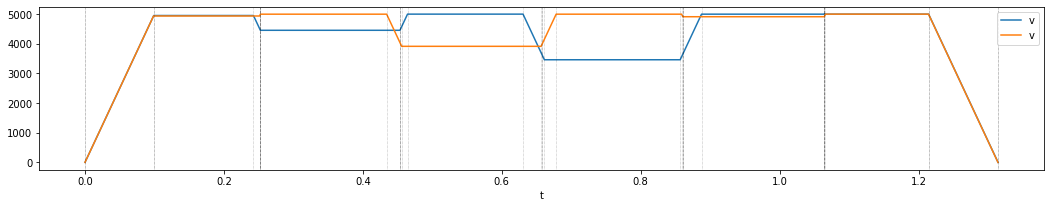

In [99]:
# Too many planning updates for sid=1.
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Segment, SegmentList, Joint
from trajectory.gsolver import ACDBlock

j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)   
s = sl.move([1000,1000])
s = sl.move([900,1000])
s = sl.move([1000,800])
s = sl.move([700,1000])
s = sl.move([1000,1000])
s = sl.move([1000,1000])
sl.plot()
print([s.times_e_rms for  s in sl])
sl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[]
[(4, 3), (2, 2), (0, 1)]


<Figure size 432x288 with 0 Axes>

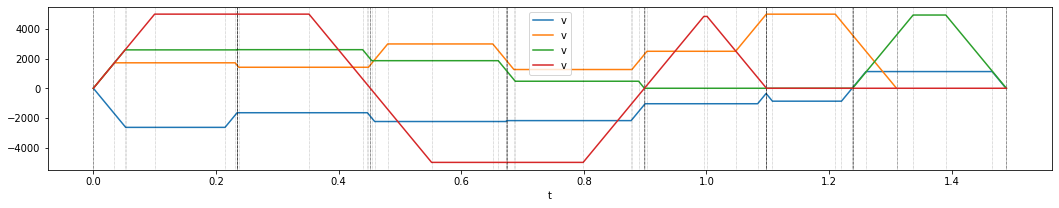

In [53]:
# Too many planning updates for sid=1.
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run startup.py

from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4

sl = SegmentList(joints)  

sl.move([-538, 372, 539, 920])
sl.move([-359, 308, 562, 838])
sl.move([-497, 631, 409, -861])
sl.move([-479, 298, 109, -874])
sl.move([-203, 557, 0, 495])
sl.move([-112, 683, 0, 0])
sl.move([257, 130, 751, 0])


sl.plot()

print([ (c.id, round(c.v_1), round(n.v_0)) for c, n in sl.discontinuities()])

print(Counter(sl.replans).most_common(10))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


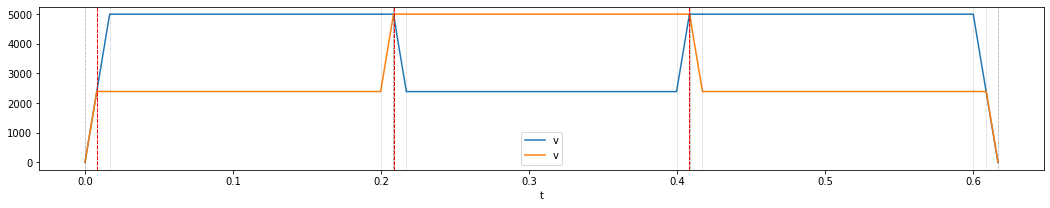

In [3]:

%load_ext autoreload
%autoreload 2
%matplotlib inline
%run startup.py
import matplotlib.pylab as plt
from pytplan.planner import Segment, SegmentList, Joint

j = Joint(5_000, 300_000)
joints = [j]*2

v = 1000
sl = SegmentList(joints)   
sl.move([v, v/2])
sl.move([v/2, v])
sl.move([v, v/2])

sl.plot()

0.1 [0.1, 0.1]
0.1 [0.1, 0.1]
0.2 [0.2, 0.2]
0.2 [0.2, 0.2]
0.3 [0.3, 0.3]
0.3 [0.3, 0.3]
0.3 [0.3, 0.3]
0.3 [0.3, 0.3]
0.30000000000000004 [0.3, 0.3]


  0 0.0000 0.1000|[0         10 20   ↗1000       60 60   ↘10     20      750] [0          2 10   ↗500        40 80   ↘2      10      750]
  1 0.1000 0.2000|[750        3 5    ↗500        92 185  ↘2      10      750] [750        4 5    ↗1000      175 175  ↘10     20      750]
  2 0.3000 0.3000|[750        4 5    ↗1000      275 275  ↘10     20        0] [750        3 5    ↗500       142 285  ↘2      10        0]
  3 0.6000 0.3000|[0          2 10   ↗-500      140 280  ↘2      10        0] [0          2 10   ↗-500      140 280  ↘2      10        0]
  4 0.9000 0.3000|[0         10 20   ↗1000      260 260  ↘10     20        0] [0          2 10   ↗500       140 280  ↘2      10        0]


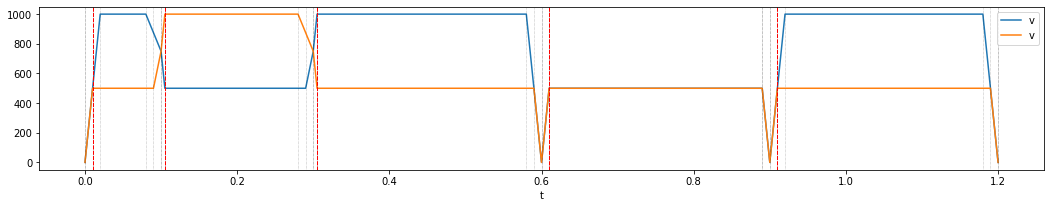

In [32]:
j = Joint(5_000, 50_000)
joints = [j]*2

v = 1000
sl = SegmentList(joints)   
sl.vmove(.1, [v, v/2])
sl.vmove(.2, [v/2, v])
sl.vmove(.3, [v, v/2])
sl.vmove(.3, [-v/2, -v/2])
sl.vmove(.3, [v, v/2])
sl.plot()
sl

In [25]:
sl[1].times
sl[0]

[0.25, 0.253333]